In [21]:
import math
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df_voos = pd.read_csv("dados/refined/voos_sp_rj_2406_2412.csv", sep=",")

In [23]:
df_voos.head()

,SIGLA ICAO EMPRESA AEREA,EMPRESA AEREA,NUMERO VOO,CODIGO DI,CODIGO TIPO LINHA,MODELO EQUIPAMENTO,NUMERO DE ASSENTOS,SIGLA AEROPORTO ORIGEM,PARTIDA PREVISTA,PARTIDA REAL,...,CIAD DEST,NOME DEST,MUNICIPIO DEST,UF DEST,LATITUDE DEST,LONGITUDE DEST,DISTANCIA KM,HORA PARTIDA REAL,CLUSTER_HORA,AQO
0,ACN,AZUL CONECTA LTDA,5121,0,N,C208,9.0,SBSP,01/06/2024 06:25,2024-06-01 06:20:00,...,RJ0005,JACAREPAGUA - ROBERTO MARINHO,RIO DE JANEIRO,RJ,-22.9875,-43.37,343.030915,06:20:00,4.0,3087.278232
1,ACN,AZUL CONECTA LTDA,5232,0,N,C208,9.0,SBSP,01/06/2024 10:45,2024-06-01 10:40:00,...,RJ0005,JACAREPAGUA - ROBERTO MARINHO,RIO DE JANEIRO,RJ,-22.9875,-43.37,343.030915,10:40:00,6.0,3087.278232
2,ACN,AZUL CONECTA LTDA,5114,0,N,C208,9.0,SBSP,02/06/2024 15:40,2024-06-02 15:38:00,...,RJ0005,JACAREPAGUA - ROBERTO MARINHO,RIO DE JANEIRO,RJ,-22.9875,-43.37,343.030915,15:38:00,8.0,3087.278232
3,ACN,AZUL CONECTA LTDA,5220,0,N,C208,9.0,SBSP,02/06/2024 13:40,2024-06-02 13:33:00,...,RJ0005,JACAREPAGUA - ROBERTO MARINHO,RIO DE JANEIRO,RJ,-22.9875,-43.37,343.030915,13:33:00,7.0,3087.278232
4,ACN,AZUL CONECTA LTDA,5226,0,N,C208,9.0,SBSP,02/06/2024 20:10,2024-06-02 20:17:00,...,RJ0005,JACAREPAGUA - ROBERTO MARINHO,RIO DE JANEIRO,RJ,-22.9875,-43.37,343.030915,20:17:00,11.0,3087.278232


In [24]:
df_voos.sample(5)

,SIGLA ICAO EMPRESA AEREA,EMPRESA AEREA,NUMERO VOO,CODIGO DI,CODIGO TIPO LINHA,MODELO EQUIPAMENTO,NUMERO DE ASSENTOS,SIGLA AEROPORTO ORIGEM,PARTIDA PREVISTA,PARTIDA REAL,...,CIAD DEST,NOME DEST,MUNICIPIO DEST,UF DEST,LATITUDE DEST,LONGITUDE DEST,DISTANCIA KM,HORA PARTIDA REAL,CLUSTER_HORA,AQO
12000,GLO,GOL LINHAS AEREAS,1008,0,N,B738,186.0,SBSP,28/12/2024 08:00,2024-12-28 08:01:00,...,RJ0002,SANTOS DUMONT,RIO DE JANEIRO,RJ,-22.91,-43.1625,365.667493,08:01:00,5.0,68014.153605
3039,GLO,GOL LINHAS AEREAS,1012,0,N,B737,138.0,SBSP,31/07/2024 09:15,2024-07-31 09:24:00,...,RJ0002,SANTOS DUMONT,RIO DE JANEIRO,RJ,-22.91,-43.1625,365.667493,09:24:00,5.0,50462.113965
4618,GLO,GOL LINHAS AEREAS,1050,0,N,B738,186.0,SBSP,18/08/2024 20:50,2024-08-18 21:18:00,...,RJ0002,SANTOS DUMONT,RIO DE JANEIRO,RJ,-22.91,-43.1625,365.667493,21:18:00,11.0,68014.153605
189,AZU,AZUL LINHAS AEREAS,2610,0,N,E195,118.0,SBSP,03/06/2024 16:25,2024-06-03 16:29:00,...,RJ0002,SANTOS DUMONT,RIO DE JANEIRO,RJ,-22.91,-43.1625,365.667493,16:29:00,9.0,43148.764115
2833,GLO,GOL LINHAS AEREAS,1012,0,N,B738,186.0,SBSP,22/07/2024 09:15,2024-07-22 09:11:00,...,RJ0002,SANTOS DUMONT,RIO DE JANEIRO,RJ,-22.91,-43.1625,365.667493,09:11:00,5.0,68014.153605


In [25]:
df_voos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12693 entries, 0 to 12692
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SIGLA ICAO EMPRESA AEREA  12693 non-null  object 
 1   EMPRESA AEREA             12693 non-null  object 
 2   NUMERO VOO                12693 non-null  object 
 3   CODIGO DI                 12693 non-null  int64  
 4   CODIGO TIPO LINHA         12693 non-null  object 
 5   MODELO EQUIPAMENTO        12693 non-null  object 
 6   NUMERO DE ASSENTOS        12693 non-null  float64
 7   SIGLA AEROPORTO ORIGEM    12693 non-null  object 
 8   PARTIDA PREVISTA          12693 non-null  object 
 9   PARTIDA REAL              12683 non-null  object 
 10  SIGLA AEROPORTO DESTINO   12693 non-null  object 
 11  CHEGADA PREVISTA          12693 non-null  object 
 12  CHEGADA REAL              12693 non-null  object 
 13  SITUACAO VOO              12693 non-null  object 
 14  JUSTIF

In [26]:
df_voos.shape

(12693, 36)

In [27]:
df_voos.dtypes

SIGLA ICAO EMPRESA AEREA     object
EMPRESA AEREA                object
NUMERO VOO                   object
CODIGO DI                     int64
CODIGO TIPO LINHA            object
MODELO EQUIPAMENTO           object
NUMERO DE ASSENTOS          float64
SIGLA AEROPORTO ORIGEM       object
PARTIDA PREVISTA             object
PARTIDA REAL                 object
SIGLA AEROPORTO DESTINO      object
CHEGADA PREVISTA             object
CHEGADA REAL                 object
SITUACAO VOO                 object
JUSTIFICATIVA                object
REFERENCIA                   object
SITUACAO PARTIDA             object
SITUACAO CHEGADA             object
CODIGO OACI_x                object
CIAD ORIG                    object
NOME ORIG                    object
MUNICIPIO ORIG               object
UF ORIG                      object
LATITUDE ORIG               float64
LONGITUDE ORIG              float64
CODIGO OACI_y                object
CIAD DEST                    object
NOME DEST                   

In [28]:
df_voos.describe()

,CODIGO DI,NUMERO DE ASSENTOS,LATITUDE ORIG,LONGITUDE ORIG,LATITUDE DEST,LONGITUDE DEST,DISTANCIA KM,CLUSTER_HORA,AQO
count,12693.0,12693.000000,1.269300e+04,1.269300e+04,12693.000000,12693.000000,12693.000000,12683.000000,12693.000000
mean,0.0,140.540928,-2.362611e+01,-4.665639e+01,-22.910837,-43.186354,363.284030,7.474966,51313.693714
std,0.0,48.577617,3.552854e-15,7.105707e-15,0.033800,0.061173,6.496951,2.329619,17777.100364
min,0.0,9.000000,-2.362611e+01,-4.665639e+01,-22.987500,-43.370000,343.030915,3.000000,3087.278232
25%,0.0,118.000000,-2.362611e+01,-4.665639e+01,-22.910000,-43.162500,365.667493,5.000000,43148.764115
50%,0.0,144.000000,-2.362611e+01,-4.665639e+01,-22.910000,-43.162500,365.667493,8.000000,52656.118920
75%,0.0,186.000000,-2.362611e+01,-4.665639e+01,-22.910000,-43.162500,365.667493,10.000000,68014.153605
max,0.0,186.000000,-2.362611e+01,-4.665639e+01,-22.810000,-43.162500,365.667493,12.000000,68014.153605


In [29]:
df_voos["NUMERO DE ASSENTOS"].nunique()

8

### Graficos:

- Gráfico de linha com duas linhas: eixo x horas do dia e eixo y numero de voos 1 linha latam 2 linha outras companhias

- Grafico de barras + filtro: Filtro por Cluster de horario + Grafico de barras com top 5 empresas com maior disponibilidade de assentos por horario e uma sexta barra com a disponibilidade da LATAM

- Matriz de correlação para identificar o que mais causou reclamações em cada mes


### Notas:

- Realizar estudo para entender a importancia do tamanho do avião


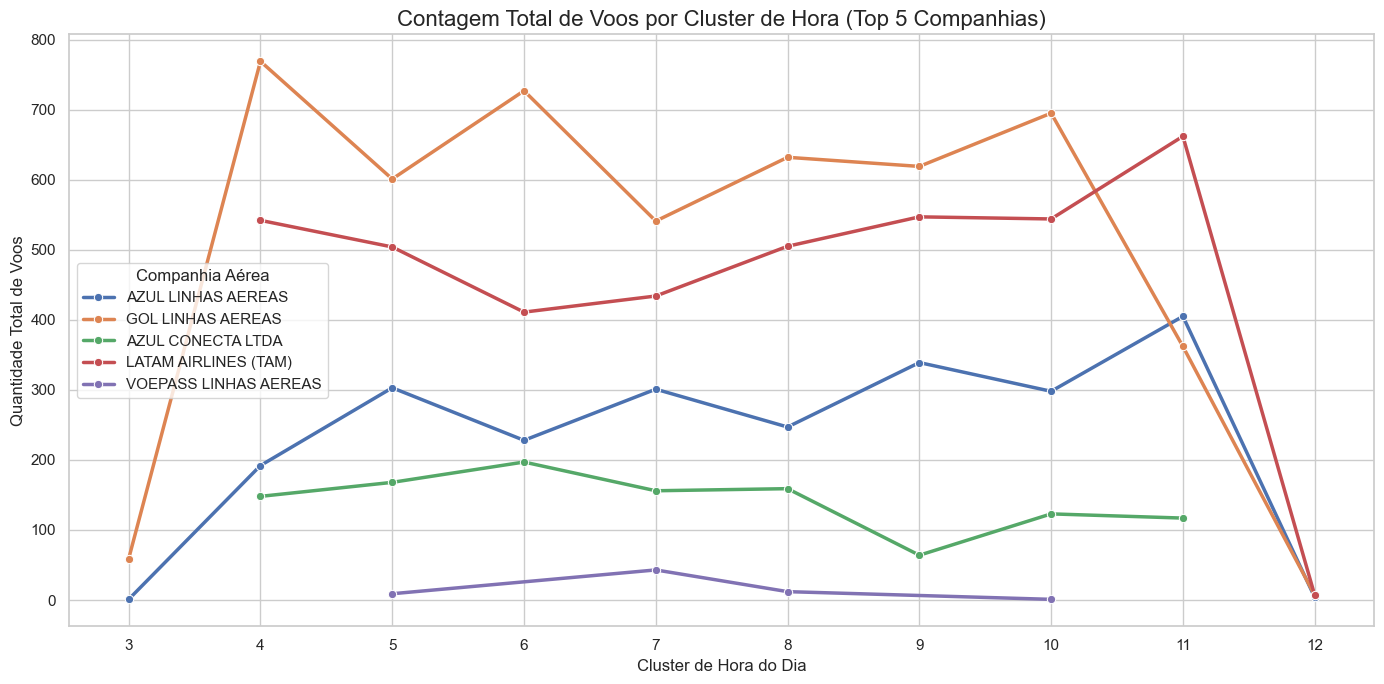

In [32]:
dados_para_grafico = df_voos.groupby(['CLUSTER_HORA', 'EMPRESA AEREA']).size().reset_index(name='total_voos')
        
        # Opcional: Salvar este DataFrame de resumo para usar no Grafana depois
        # dados_para_grafico.to_csv('resumo_voos_por_hora_top5.csv', index=False)
        # print("   - DataFrame de resumo salvo em 'resumo_voos_por_hora_top5.csv'")

        # --- PASSO 3: Criar o Gráfico ---


        # Configura o estilo do gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

        # Cria o gráfico de linha com o Seaborn
        # O parâmetro 'hue' é a mágica que cria uma linha para cada empresa
ax = sns.lineplot(
            data=dados_para_grafico,
            x='CLUSTER_HORA',
            y='total_voos',
            hue='EMPRESA AEREA',
            marker='o',  # Adiciona um marcador de ponto em cada dado
            linewidth=2.5
        )

        # Melhora a aparência do gráfico
plt.title('Contagem Total de Voos por Cluster de Hora (Top 5 Companhias)', fontsize=16)
plt.xlabel('Cluster de Hora do Dia', fontsize=12)
plt.ylabel('Quantidade Total de Voos', fontsize=12)
        
        # Garante que o eixo X mostre todos os números inteiros dos clusters
ax.set_xticks(dados_para_grafico['CLUSTER_HORA'].unique())
plt.legend(title='Companhia Aérea')
plt.tight_layout() # Ajusta o layout para não cortar os títulos


In [34]:
top_5_empresas = df_voos['EMPRESA AEREA'].value_counts().nlargest(5).index
df_top5 = df_voos[df_voos['EMPRESA AEREA'].isin(top_5_empresas)]
dados_para_grafico = df_top5.groupby(['CLUSTER_HORA', 'EMPRESA AEREA']).size().reset_index(name='total_voos')

dados_para_grafico.to_csv('dados/refined/voos_clusterHora_sep_por_empresa.csv', index=False)